# Quest 5. Pandas 2

In [1]:
# Import Modules
import pandas as pd

## Part A. States and Area Codes

In [2]:
dfa = pd.read_csv('states.areacodes.csv')
# Get rid of Washington,DC
dfa = dfa[dfa.State != "Washington,DC"]
# Only leave States with one area code, and sort alphabetically
dfa = dfa[dfa.groupby('State').State.transform(len) == 1]
dfa = dfa.sort_values(by='State')
# Display dataframe
dfa

,Area code,State,State code
246,907,Alaska,AK
41,302,Delaware,DE
211,808,Hawaii,HI
6,208,Idaho,ID
5,207,Maine,ME
76,406,Montana,MT
139,603,New Hampshire,NH
107,505,New Mexico,NM
169,701,North Dakota,ND
72,401,Rhode Island,RI


## Part B. Zipcodes and States

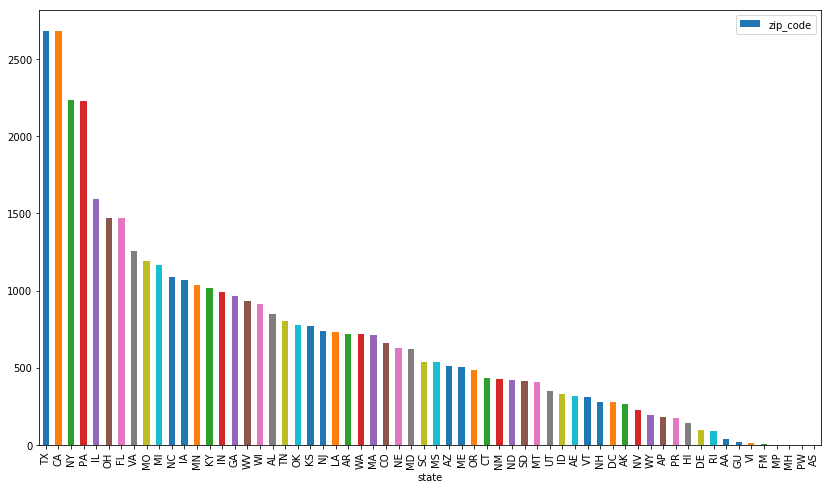

In [3]:
%matplotlib inline
dfb = pd.read_csv('zipcodes.states.gps.csv')
# get the count of zipcodes for each State/Area
dfb = dfb.groupby('state').count()
# sort the values for bar chart
dfb = dfb.sort_values(by="zip_code",ascending=False)
# Adjust the figure size for visibility
dfb.plot.bar(y='zip_code', figsize=(14,8))

## Part C. Films

In [4]:
dfc = pd.read_csv('films2.csv')
# Simply replace the value of the field
dfc = dfc.replace('Westerns', 'Western')
# If this results in any duplicates, drop that row
dfc = dfc.drop_duplicates()

In [5]:
# Get the highest number of appearances
dfn = dfc.groupby('Subject')['Actor'].value_counts()

In [6]:
subject_list = ['Action',
'Adventure',
'Comedy',
'Crime',
'Drama',
'Fantasy',
'Horror',
'Music',
'Mystery',
'Romance',
'Science Fiction',
'Short',
'War',
'Western']

print(
    '{} {} {}'.format(
        'Subject'.ljust(16), 
        'Actor'.ljust(16), 
        'nFilms'.ljust(16)
    )
)

for i in subject_list:
    # Only count where the max is greater than 1
    if dfn[i].max() > 1:
        # Parse through Pandas Series!
        print(
            '{} {} {}'.format(
                str(i).ljust(16),
                str(dfn[i].head(1).index[0]).ljust(16), 
                str(dfn[i].head(1)[0]).ljust(16)
            )
        )


Subject          Actor            nFilms          
Action           Connery, Sean    15              
Comedy           Sellers, Peter   22              
Drama            Brando, Marlon   17              
Horror           Ford, Wallace    3               
Mystery          Connery, Sean    3               
Science Fiction  Hamill, Mark     3               
War              Wayne, John      10              
Western          Wayne, John      46              


## Part D. Stock Trading & Moving Averages

In [7]:
# Read in and sort the csv
dfd = pd.read_csv(
    'SPY.histdata.csv', 
    parse_dates=['Date']
).sort_values(by='Date')

dfd.head()

,Date,SPY
4701,2000-01-03,102.9308
4700,2000-01-04,98.9057
4699,2000-01-05,99.0826
4698,2000-01-06,97.4902
4697,2000-01-07,103.1521


In [8]:
# Add column MA100
dfd['MA100'] = dfd['SPY'].rolling(100).mean()
# Drop first 99 Rows
dfd = dfd.dropna()
dfd.head()

,Date,SPY,MA100
4602,2000-05-24,99.5118,101.376287
4601,2000-05-25,97.8044,101.325023
4600,2000-05-26,97.9153,101.315119
4599,2000-05-30,101.1082,101.335375
4598,2000-05-31,101.3300,101.373773


### Moving Average Strategy

1. Assume you are investing all of your money every purchase

2. Purchase stock if SPY >= MA and currently you have cash, which means you have no need for liquidation of current asset to purchase the stock.
    - asset becomes cash * SPY rate
    - cash becomes 0 because you spend all of it buying stock
    - saved index becomes current SPY
    
3. Sell stock if SPY < MA
    - cash becomes  
    ${Cash_{before} \times SPY_{curr}} \over SPY_{before}$  
    where $Cash_{before}$ is what you spent to purchase the stock  
    - asset becomes 0, because you sell all your stock
    
### Buy and Hold Strategy

1. Buy at initial equity, and sell at the end.

In [9]:
# Stock Trading Algorithm

def moving_average(seed, df):
    current_cash = seed
    current_asset = 0.0
    transaction_index = 0.0
    cash_before = 0.0
    
    for index, row in df.iterrows():
        
        # Buy 
        if row['SPY'] >= row['MA100'] and current_cash > 0.0:
            cash_before = current_cash
            current_asset = current_cash*row['SPY']
            current_cash = 0.0
            transaction_index = row['SPY']
        # Sell
        elif row['SPY'] < row['MA100'] and current_cash is 0.0:
            current_cash = float((cash_before*row['SPY'])/transaction_index)
            current_asset = 0.0
            transaction_index = row['SPY']
        else:
            continue

    # In case we don't sell before comparison
    if current_cash == 0.0:
        current_cash = float(current_asset/transaction_index)
    
    # Compute gain/loss
    percent_gain = ((current_cash-seed)/seed)*100.0

    return percent_gain

def buy_and_hold(seed, df):
    counter = 0
    current_SPY = 0.0

    for index, row in df.iterrows():
        if counter is 0:
            start_SPY = row['SPY']
            counter += 1
        current_SPY = row['SPY']
    
    end_cash = float((current_SPY-start_SPY)*seed)
    
    percent_gain = ((end_cash-seed)/seed)
    
    return percent_gain

In [10]:
print(
    '{}: {}%'.format(
        'Moving Average:', 
        moving_average(1000.0, dfd))
)

print(
    '{}: {}%'.format(
        'Buy and Hold: ', 
        buy_and_hold(1000.0, dfd))
)

Moving Average:: 104.32777453032462%
Buy and Hold: : 187.58820000000003%


The Moving Average strategy actually has much lower return than that of Buy and Hold! Alright, going to buy some Amazon Stock and gonna forget about it for 20 years now.